In [21]:
import numpy as np
import pandas as pd
import time
import threading
import matplotlib.pyplot as plt
import psutil

In [22]:
def generate_random_matrices(n, size):
    matrices = []
    for _ in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

In [23]:
def multiply_matrices(matrices, constant_matrix):
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def perform_multiplication_with_threads(num_threads, matrices, constant_matrix):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=multiply_matrices, args=(matrices[i:i+num_threads], constant_matrix))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

def measure_cpu_usage():
    cpu_usage = []
    for _ in range(10):  # Take 10 measurements
        cpu_usage.append(psutil.cpu_percent(interval=1))
    return sum(cpu_usage) / len(cpu_usage)

In [24]:
num_matrices = 100
matrix_size = 1000
matrices = generate_random_matrices(num_matrices, matrix_size)
constant_matrix = np.random.rand(matrix_size, matrix_size)

In [25]:
results = {}
cpu_usages = {}

for num_threads in range(1, 9):
    time_taken = perform_multiplication_with_threads(num_threads, matrices, constant_matrix)
    cpu_usage = measure_cpu_usage()
    results[num_threads] = time_taken
    cpu_usages[num_threads] = cpu_usage

In [26]:
# Convert results to DataFrame
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df['Threads'] = df.index

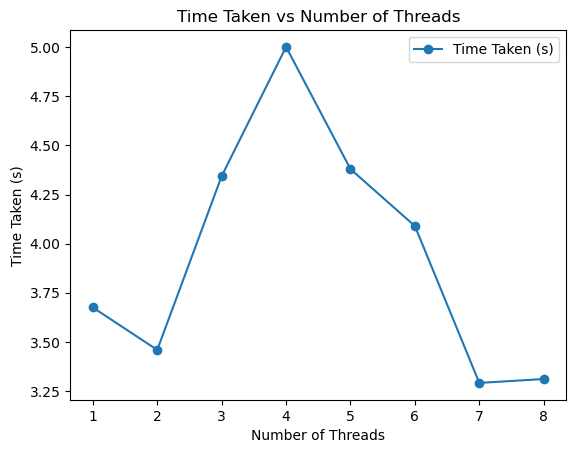

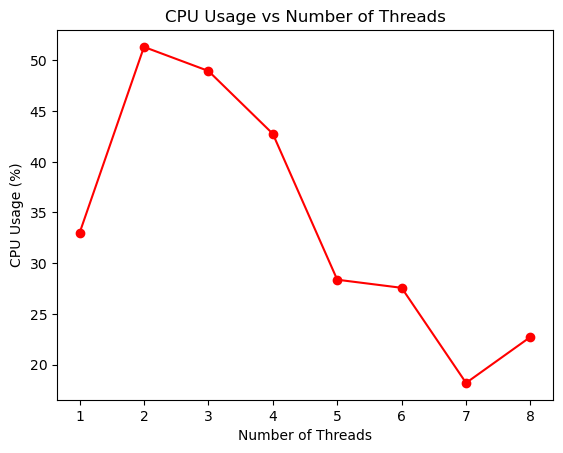

In [27]:
# Plot time taken
df.plot(x='Threads', y='Time Taken (s)', marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
# Plot CPU usage
plt.figure()
plt.plot(list(cpu_usages.keys()), list(cpu_usages.values()), marker='o', color='r')
plt.xlabel('Number of Threads')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage vs Number of Threads')

plt.show()
